| Feature          | Description                                                |
|------------------|------------------------------------------------------------|
| step             | Tells about the unit of time                               |
| type             | Type of transaction done                                   |
| amount           | The total amount of transaction                             |
| nameOirg          | Account that starts the transaction                         |
| oldbalanceOrg    | Balance of the account of sender before transaction         |
| newbalanceOrg    | Balance of the account of sender after transaction          |
| nameDest         | Account that receives the transaction                       |
| oldbalanceDest   | Balance of the account of receiver before transaction       |
| newbalanceDest   | Balance of the account of receiver after transaction        |
| isFraud          | The value to be predicted i.e. 0 or 1                       |


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
data = pd.read_csv('data\onlinefraud.csv')
data.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [30]:
data.columns

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [31]:
data.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [33]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
173826,12,PAYMENT,13130.85,C1084049657,61185.00,48054.15,M781193383,0.00,0.00,0
1126421,131,PAYMENT,15034.47,C1411785832,60785.00,45750.53,M992814003,0.00,0.00,0
1440008,140,CASH_OUT,117833.59,C976553126,50838.00,0.00,C1317353214,0.00,117833.59,0
564845,22,CASH_IN,24103.39,C543475286,305.00,24408.39,C83597748,0.00,0.00,0
280985,15,CASH_IN,112629.80,C489027637,718089.21,830719.01,C148665287,3658554.04,3545924.23,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776789 entries, 0 to 1776788
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 135.6+ MB


In [35]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.776789e+06,1.776789e+06,1.776789e+06,1.776789e+06,1.776789e+06,1.776789e+06,1.776789e+06
mean,7.437114e+01,1.624953e+05,8.571934e+05,8.784280e+05,9.960762e+05,1.118316e+06,1.043455e-03
std,5.871183e+01,2.692256e+05,2.920721e+06,2.956857e+06,2.306200e+06,2.404562e+06,3.228571e-02
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.900000e+01,1.326558e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.200000e+01,7.941273e+04,1.505600e+04,0.000000e+00,1.379044e+05,2.304199e+05,0.000000e+00
75%,1.370000e+02,2.187291e+05,1.227820e+05,1.654105e+05,9.479691e+05,1.158135e+06,0.000000e+00
max,1.620000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.228378e+07,1.000000e+00


In [54]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
int_cols = list(int_[int_].index)
print("Integer variables:", len(int_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 2
Float variables: 5


In [55]:
num_cols=int_cols+fl_cols
num_cols

['step',
 'isFraud',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

***1.Count plot of the Payment type column***

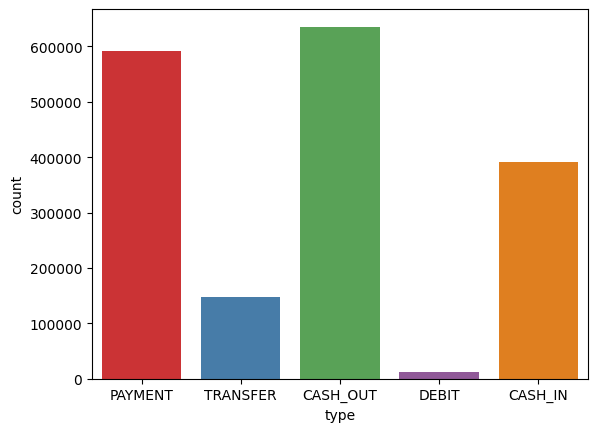

In [45]:
sns.countplot(x='type', data=data, hue='type', palette='Set1', legend=False)
plt.show()

***2.Bar plot for analyzing Type and amount column simultaneously***

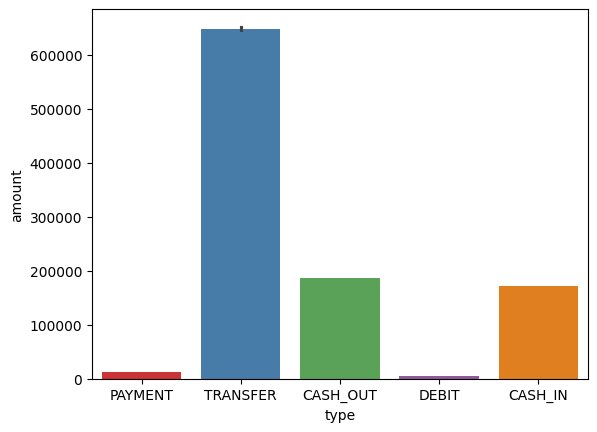

In [47]:
sns.barplot(x='type', y='amount',hue='type', data=data,palette='Set1')
plt.show()

**Inference-Both the graph clearly shows that mostly the type cash_out and transfer are maximum in count and as well as in amount**

***3.Distribution of data among both the prediction values.***

In [48]:
data['isFraud'].value_counts()

isFraud
0    1774935
1       1854
Name: count, dtype: int64

count are very different so sampling is needed

***4.Distribution of the step column using distplot.***

C:\Users\DAYABAN\AppData\Local\Temp\ipykernel_12512\218950194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


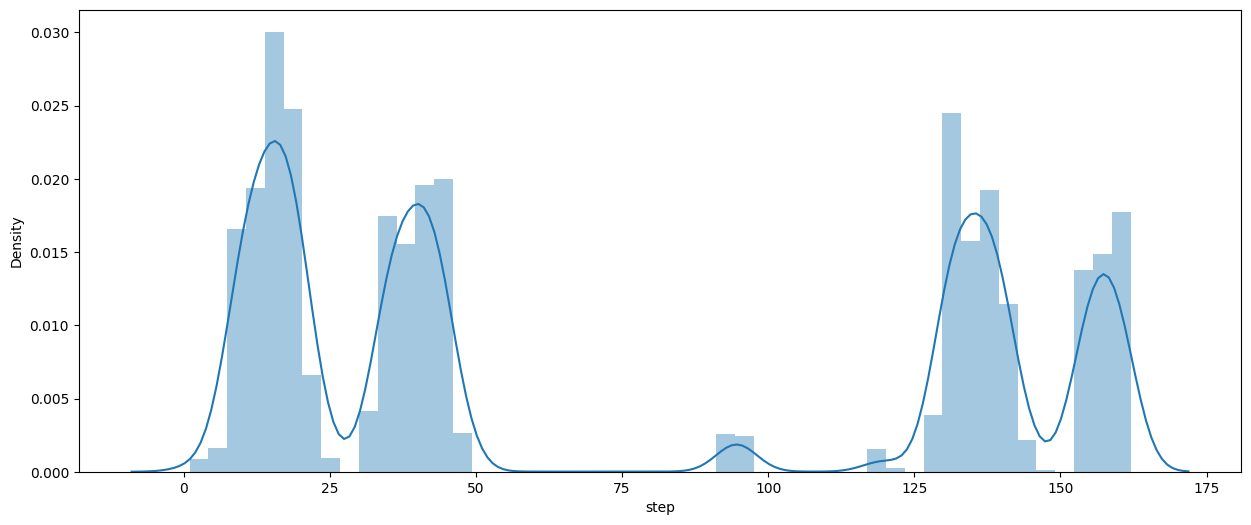

In [49]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)
plt.show()

<Axes: >

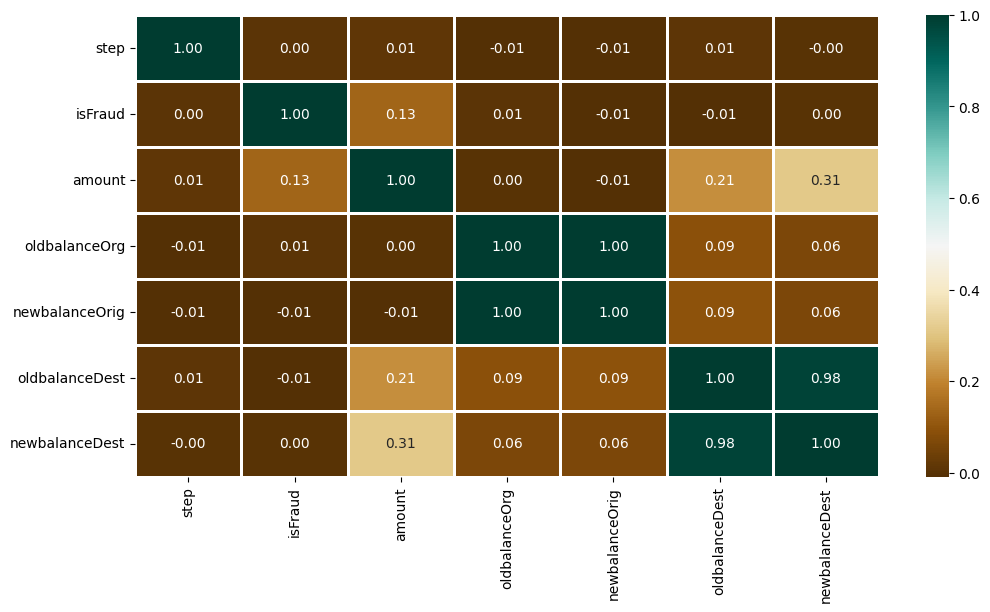

In [56]:
plt.figure(figsize=(12, 6))
sns.heatmap(data[num_cols].corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)
